Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90     53897
           1       0.89      0.92      0.90     53929

    accuracy                           0.90    107826
   macro avg       0.90      0.90      0.90    107826
weighted avg       0.90      0.90      0.90    107826

Accuracy: 0.8998015320980097


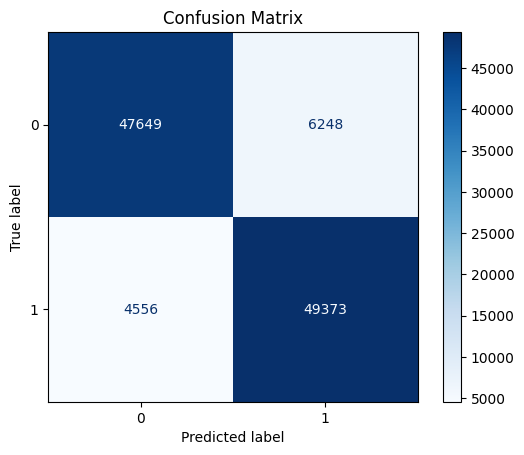

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("heart_data_smote_modified.csv")

# Split features and target
X = df.drop(columns="HeartDisease")
y = df["HeartDisease"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()




In [2]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import joblib

# تحميل البيانات
df = pd.read_csv("heart_data_smote_modified.csv")

# فصل الميزات عن الهدف
X = df.drop(columns="HeartDisease")
y = df["HeartDisease"]

# تحديد الميزات الفئوية والعددية
categorical_features = ["Smoking", "DiffWalking", "Sex", "AgeCategory",
                        "Race", "Diabetic", "PhysicalActivity",
                        "GenHealth", "HasHealthIssues"]
numerical_features = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]

# إنشاء ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# إنشاء Pipeline مع النموذج
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
])

# تدريب الـ Pipeline
pipeline.fit(X, y)

# حفظ الـ Pipeline بضغط عالي جدًا
joblib.dump(pipeline, "model_pipeline_compressed.pkl", compress=9)



['model_pipeline_compressed.pkl']